Link dataset: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from sklearn.model_selection import KFold   
from statistics import mean
import joblib 

Load data

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Melbourne_housing_FULL.csv')

In [ ]:
# xóa tất cả các hàng thiếu dữ liệu và lưu vào file mới
raw_data= raw_data.dropna()
raw_data.to_csv('/content/drive/MyDrive/Melbourne_housing_FULL_new.csv',index= False)

Khái quát thông tin dữ liệu

In [ ]:
print('\n____________ Dataset info ____________')
print(raw_data.info())        


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8877 non-null   object 
 1   Address        8877 non-null   object 
 2   Rooms          8877 non-null   int64  
 3   Type           8877 non-null   object 
 4   Price          8877 non-null   int64  
 5   Method         8877 non-null   object 
 6   SellerG        8877 non-null   object 
 7   Date           8877 non-null   object 
 8   Distance       8877 non-null   float64
 9   Postcode       8877 non-null   int64  
 10  Bedroom2       8877 non-null   int64  
 11  Bathroom       8877 non-null   int64  
 12  Car            8877 non-null   int64  
 13  Landsize       8877 non-null   int64  
 14  BuildingArea   8877 non-null   float64
 15  YearBuilt      8877 non-null   int64  
 16  CouncilArea    8877 non-null   object 
 17  Lattitude   

In [ ]:
print(raw_data.head(3))

       Suburb          Address  Rooms Type    Price Method SellerG      Date  \
0  Abbotsford  25 Bloomburg St      2    h  1035000      S  Biggin  4/2/2016   
1  Abbotsford     5 Charles St      3    h  1465000     SP  Biggin  4/3/2017   
2  Abbotsford      55a Park St      4    h  1600000     VB  Nelson  4/6/2016   

   Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0       2.5      3067  ...         1    0       156          79.0       1900   
1       2.5      3067  ...         2    0       134         150.0       1900   
2       2.5      3067  ...         1    2       120         142.0       2014   

          CouncilArea Lattitude  Longtitude             Regionname  \
0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
1  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   
2  Yarra City Council  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0          4019  
1          4019  
2          4019  

[3 r

In [ ]:
print(raw_data['Suburb'].value_counts()) 

Reservoir           194
Richmond            155
Brunswick           152
Bentleigh East      138
Coburg              135
                   ... 
Waterways             1
Beaconsfield          1
Springvale South      1
Yarra Glen            1
Research              1
Name: Suburb, Length: 309, dtype: int64


In [ ]:
print(raw_data.describe())  

             Rooms         Price     Distance     Postcode     Bedroom2  \
count  8877.000000  8.877000e+03  8877.000000  8877.000000  8877.000000   
mean      3.098231  1.092918e+06    11.181717  3111.174721     3.077504   
std       0.963761  6.792776e+05     6.781027   111.030546     0.966232   
min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.410000e+05     6.400000  3044.000000     2.000000   
50%       3.000000  9.000000e+05    10.200000  3083.000000     3.000000   
75%       4.000000  1.345000e+06    13.900000  3150.000000     4.000000   
max      12.000000  9.000000e+06    47.400000  3977.000000    12.000000   

          Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
count  8877.000000  8877.000000   8877.000000   8877.000000  8877.000000   
mean      1.646277     1.691788    518.932410    149.279410  1965.726372   
std       0.721875     0.973438    973.576442     87.934983    37.048286   
min       1.000000  

In [ ]:
print(raw_data.iloc[[0,5,48], [2, 5]] ) # Refer using column ID

    Rooms Method
0       2      S
5       2      S
48      4      S


Biểu đồ tương quan của 2 category

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


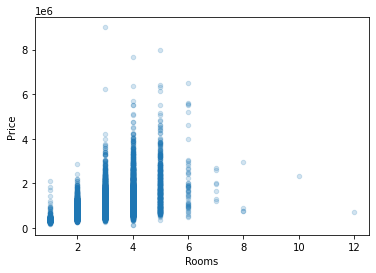

In [ ]:
raw_data.plot(kind="scatter", y="Price", x="Rooms", alpha=0.2)
#plt.axis([0, 5, 0, 10000])
plt.savefig('scatter_1_feat.png', format='png', dpi=300)
plt.show()  

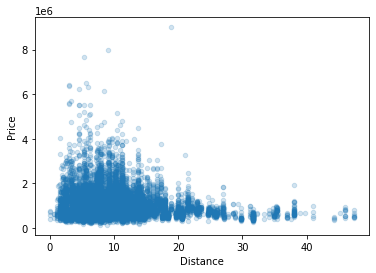

In [ ]:
raw_data.plot(kind="scatter", y="Price", x="Distance", alpha=0.2)
#plt.axis([0, 5, 0, 10000])
#plt.savefig('figures/scatter_2_feat.png', format='png', dpi=300)
plt.show()

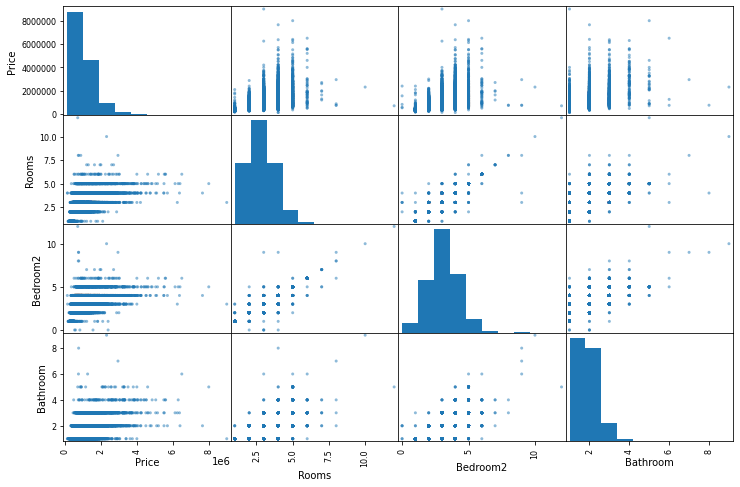

In [ ]:
from pandas.plotting import scatter_matrix   
features_to_plot = ["Price", "Rooms", "Bedroom2", "Bathroom"]
scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
plt.savefig('scatter_mat_all_feat.png', format='png', dpi=300)
plt.show()

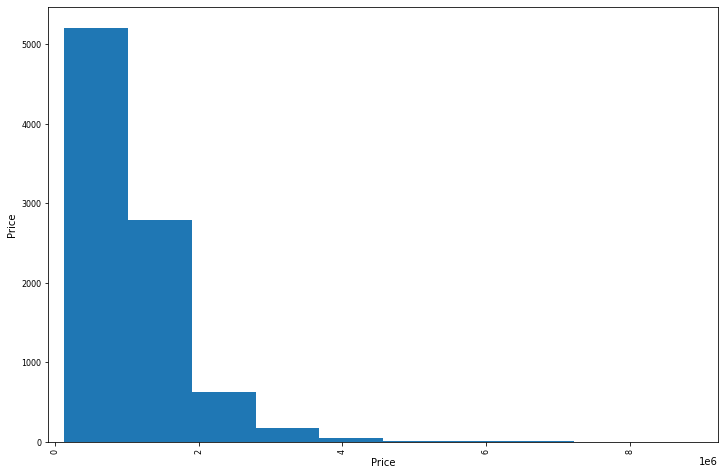

In [ ]:
from pandas.plotting import scatter_matrix   
features_to_plot = ["Price"]
scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
plt.show()

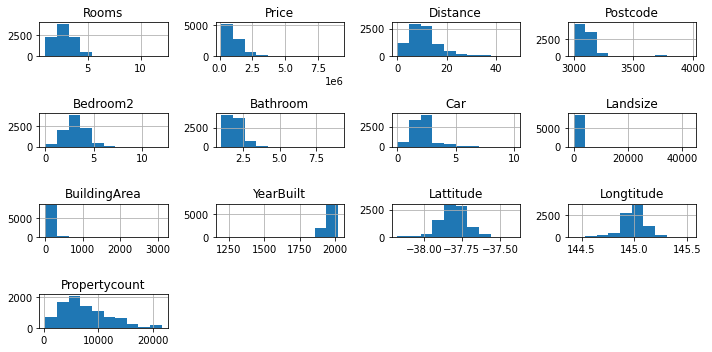

In [ ]:
raw_data.hist(figsize=(10,5)) #bins: no. of intervals
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.tight_layout()
plt.savefig('hist_raw_data.png', format='png', dpi=300) # must save before show()
plt.show()


Ma trận tương quan

In [ ]:
# 3.6 Compute correlations b/w features
corr_matrix = raw_data.corr()
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

                  Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  \
Rooms          1.000000  0.475207  0.276421  0.082462  0.964422  0.624023   
Price          0.475207  1.000000 -0.230966  0.049784  0.461002  0.463801   
Distance       0.276421 -0.230966  1.000000  0.483463  0.283288  0.122059   
Postcode       0.082462  0.049784  0.483463  1.000000  0.085474  0.112408   
Bedroom2       0.964422  0.461002  0.283288  0.085474  1.000000  0.626452   
Bathroom       0.624023  0.463801  0.122059  0.112408  0.626452  1.000000   
Car            0.402271  0.209623  0.258595  0.056677  0.406428  0.311554   
Landsize       0.106026  0.061902  0.128223  0.063321  0.105804  0.080578   
BuildingArea   0.606591  0.506936  0.135986  0.078332  0.595142  0.553893   
YearBuilt      0.006120 -0.314170  0.313252  0.088257  0.015492  0.192638   
Lattitude      0.019378 -0.226245 -0.052136 -0.189082  0.023404 -0.042005   
Longtitude     0.082483  0.214100  0.161569  0.355524  0.082106  0.109260   

Kết hợp dữ liệu

In [ ]:
# 3.7 Try combining features
raw_data["Total_rooms"] = raw_data["Bedroom2"] + raw_data["Bathroom"] +raw_data["Rooms"] 

corr_matrix = raw_data.corr()
print(corr_matrix["Price"].sort_values(ascending=False)) # print correlation b/w a feature and other features
raw_data.drop(columns = ["Total_rooms"], inplace=True) # remove experiment columns
#endregion

Price            1.000000
Total_rooms      0.508827
BuildingArea     0.506936
Rooms            0.475207
Bathroom         0.463801
Bedroom2         0.461002
Longtitude       0.214100
Car              0.209623
Landsize         0.061902
Postcode         0.049784
Propertycount   -0.059538
Lattitude       -0.226245
Distance        -0.230966
YearBuilt       -0.314170
Name: Price, dtype: float64


Xóa cột không cần thiết 

In [ ]:
raw_data.drop(columns = ["SellerG", "Lattitude", "Longtitude", "Postcode","Propertycount"], inplace=True) 

 PART 4. PREPARE THE DATA 

In [ ]:
raw_data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,8877.000000,8.877000e+03,8877.000000,8877.000000,8877.000000,8877.000000,8877.000000,8877.000000,8877.000000
mean,3.098231,1.092918e+06,11.181717,3.077504,1.646277,1.691788,518.932410,149.279410,1965.726372
std,0.963761,6.792776e+05,6.781027,0.966232,0.721875,0.973438,973.576442,87.934983,37.048286
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000
25%,2.000000,6.410000e+05,6.400000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,477.000000,132.000000,1970.000000
75%,4.000000,1.345000e+06,13.900000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000
max,12.000000,9.000000e+06,47.400000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000


Gắn label cho khoảng giá 

In [ ]:
raw_data["Price_range"] = pd.cut(raw_data["Price"],
                                bins=[0, 200000, 400000, 600000, 800000,1000000, np.inf],
                                #labels=["<2 tỷ", "2-4 tỷ", "4-6 tỷ", "6-8 tỷ", "8-10 tỷ", ">10 tỷ"])
                                labels=[2,4,6,8,10,100]) # use numeric labels to plot histogram

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit  
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

tách bộ dữ liệu train và test 

In [ ]:
for train_index, test_index in splitter.split(raw_data, raw_data["Price_range"]): # Feature "KHOẢNG GIÁ" must NOT contain NaN
        train_set = raw_data.iloc[train_index]
        test_set = raw_data.iloc[test_index] 

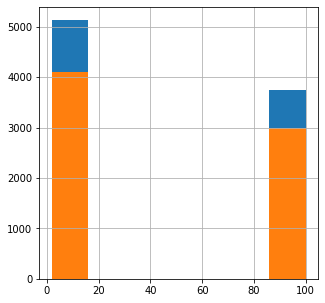

In [ ]:
raw_data["Price_range"].hist(bins=7, figsize=(5,5)); #plt.show();
train_set["Price_range"].hist(bins=7, figsize=(5,5)); plt.show()

Xóa cột dữ liệu khoảng giá 

In [ ]:
for _set_ in (train_set, test_set):
        #_set_.drop("income_cat", axis=1, inplace=True) # axis=1: drop cols, axis=0: drop rows
        _set_.drop(columns="Price_range", inplace=True) 

<ipython-input-22-00f1ce0016ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _set_.drop(columns="Price_range", inplace=True)
<ipython-input-22-00f1ce0016ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _set_.drop(columns="Price_range", inplace=True)


In [ ]:
print('\n____________ Split training and test set ____________')     
print(len(train_set), "training +", len(test_set), "test examples")
print(train_set.head(4))


____________ Split training and test set ____________
7101 training + 1776 test examples
           Suburb            Address  Rooms Type    Price Method        Date  \
326        Balwyn      321a Union Rd      3    h  1500000     SP  28/08/2016   
1693      Hampton   5/440 Hampton St      2    u   616000     PI    6/8/2016   
8177  Middle Park  308 Richardson St      4    h  3150000     VB    3/3/2018   
5086      Glenroy        1/8 York St      3    h   512000      S  24/06/2017   

      Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
326        9.7         3         2    2       404         190.0       2011   
1693      13.7         2         1    1         0         104.0       2005   
8177       3.0         4         2    4       183         188.0       1890   
5086      11.2         3         1    2       197          96.0       2003   

                    CouncilArea             Regionname  
326     Boroondara City Council  Southern Metropolitan  
1693

Chia label từ data 

In [ ]:
train_set_labels = train_set["Price"].copy()
train_set = train_set.drop(columns = "Price") 
test_set_labels = test_set["Price"].copy()
test_set = test_set.drop(columns = "Price") 

Xác định class xử lí cột cho transformer 

In [ ]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, dataframe, labels=None):
        return self
    def transform(self, dataframe):
        return dataframe[self.feature_names].values         

num_feat_names = ['Rooms', 'Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt'] # =list(train_set.select_dtypes(include=[np.number]))
cat_feat_names = ['Suburb', 'Address', 'Type','Method','Date','CouncilArea','Regionname']

Pipeline 

In [ ]:
cat_pipeline = Pipeline([
    ('selector', ColumnSelector(cat_feat_names)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "NO INFO", copy=True)), # complete missing values. copy=False: imputation will be done in-place 
    ('cat_encoder',OneHotEncoder(handle_unknown='ignore')) # convert categorical data into one-hot vectors
    ])    


Kiểm tra cách hoạt động của pipeline 

In [ ]:
if 0:
    trans_feat_values_1 = cat_pipeline.fit_transform(train_set)

    # The above line of code is equavalent to the following code:     
    selector  = ColumnSelector(cat_feat_names)
    temp_feat_values = selector.fit_transform(train_set) 
    imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "NO INFO", copy=True)
    temp_feat_values = imputer.fit_transform(temp_feat_values) 
    one_hot_encoder = OneHotEncoder()
    trans_feat_values_2 = one_hot_encoder.fit_transform(temp_feat_values)
    if 0: 
        # See the encoded features
        print(one_hot_encoder.categories_) # INFO: categories_ is an array of array: categories_[0] is the array of feature 1, categories_[1] is the array of feature 2,...
        # NOTE: OneHotEncoder turns 1 features into N features, where N is the no. of values in that feature
        # e.g., feature "HƯỚNG" having 5 values 'Đông', 'Tây', 'Nam', 'Bắc', 'NO INFO', will become 5 features corresponding with its values 
        print(one_hot_encoder.get_feature_names(cat_feat_names))
        print("No. of one-hot columns: " + str(one_hot_encoder.get_feature_names(cat_feat_names).shape[0]))
        print(trans_feat_values_2[[0,1,2],:].toarray()) # toarray() convert sparse to dense array
    
    # Check if trans_feat_values_1 and trans_feat_values_2 are the same
    #print(trans_feat_values_1.toarray() == trans_feat_values_2.toarray())
    print(np.array_equal(trans_feat_values_1.toarray(), trans_feat_values_2.toarray()))


xác định thuộc tính mới cho dữ liệu 

In [ ]:
class MyFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_Total_rooms = True): # MUST NO *args or **kargs
        self.add_Total_rooms = add_Total_rooms
    def fit(self, feature_values, labels = None):
        return self  # nothing to do here
    def transform(self, feature_values, labels = None):
        if self.add_Total_rooms:        
            Rooms_id, Bedroom2_id,Bathroom_id = 1, 2,3 # column indices in num_feat_names. can't use column names b/c the transformer SimpleImputer removed them
            # NOTE: a transformer in a pipeline ALWAYS return dataframe.values (ie., NO header and row index)
            
            Total_rooms = feature_values[:, Rooms_id] + feature_values[:,Bedroom2_id ]+ feature_values[:,Bathroom_id ]
            feature_values = np.c_[feature_values,Total_rooms ] #concatenate np arrays
        return feature_values


Pipeline cho dữ liệu số 

In [ ]:
num_pipeline = Pipeline([
    ('selector', ColumnSelector(num_feat_names)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median", copy=True)), # copy=False: imputation will be done in-place 
    ('attribs_adder', MyFeatureAdder(add_Total_rooms = True)),
    ('std_scaler', StandardScaler(with_mean=True, with_std=True, copy=True)) # Scale features to zero mean and unit variance
    ])  
  

Pipeline cho dữ liệu chữ 

In [ ]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline) ])  



In [ ]:

# 4.5 Run the pipeline to process training data           
processed_train_set_val = full_pipeline.fit_transform(train_set)
print('\n____________ Processed feature values ____________')
print(processed_train_set_val[[0, 1, 2],:].toarray())
print(processed_train_set_val.shape)
print((len(num_feat_names)))
joblib.dump(full_pipeline, r'full_pipeline.pkl')


____________ Processed feature values ____________
[[-0.09198562 -0.21039134 -0.06998348 ...  1.          0.
   0.        ]
 [-1.12551395  0.38594595 -1.10314917 ...  1.          0.
   0.        ]
 [ 0.9415427  -1.20925631  0.96318221 ...  1.          0.
   0.        ]]
(7101, 7463)
8


['full_pipeline.pkl']

In [ ]:
onehot_cols = []
for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_: 
    onehot_cols = onehot_cols + val_list.tolist()
    
columns_header = train_set.columns.tolist() + ["Total_rooms"] + onehot_cols
for name in cat_feat_names:
    columns_header.remove(name)
processed_train_set = pd.DataFrame(processed_train_set_val.toarray(), columns = columns_header)
print('\n____________ Processed dataframe ____________')
print(processed_train_set.info())
print(processed_train_set.head())



____________ Processed dataframe ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Columns: 7463 entries, Rooms to Western Victoria
dtypes: float64(7463)
memory usage: 404.3 MB
None
      Rooms  Distance  Bedroom2  Bathroom       Car  Landsize  BuildingArea  \
0 -0.091986 -0.210391 -0.069983  0.494768  0.308649 -0.118278      0.524283   
1 -1.125514  0.385946 -1.103149 -0.888441 -0.704627 -0.536002     -0.541871   
2  0.941543 -1.209256  0.963182  0.494768  2.335202 -0.346785      0.499488   
3 -0.091986  0.013235 -0.069983 -0.888441  0.308649 -0.332310     -0.641048   
4 -1.125514 -1.417974 -1.103149  0.494768 -0.704627  0.560007     -0.740225   

   YearBuilt  Total_rooms  Abbotsford  ...  Yarra City Council  \
0   1.215065    -0.155223         0.0  ...                 0.0   
1   1.054483     0.121649         0.0  ...                 0.0   
2  -2.023338    -0.944308         0.0  ...                 0.0   
3   1.000956    -0.086005         0.0  ..

Train và đánh giá model 





Try LinearRegression model 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(processed_train_set_val, train_set_labels)
print('\n____________ LinearRegression ____________')
print('Learned parameters: ', model.coef_)


____________ LinearRegression ____________
Learned parameters:  [  73740.54681621   40022.14857998   56241.71059754 ...  480866.22056295
  -29050.94302377 -229824.40322545]


In [ ]:
# 5.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse      
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


R2 score (on training data, best=1): 0.9999964706273239
Root Mean Square Error:  1279.4


In [ ]:
# 5.1.3 Predict labels for some training instances
print("\nInput data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


Input data: 
             Suburb            Address  Rooms Type Method        Date  \
326         Balwyn      321a Union Rd      3    h     SP  28/08/2016   
1693       Hampton   5/440 Hampton St      2    u     PI    6/8/2016   
8177   Middle Park  308 Richardson St      4    h     VB    3/3/2018   
5086       Glenroy        1/8 York St      3    h      S  24/06/2017   
1155   Collingwood     10/30 Mater St      2    u      S  22/08/2016   
3542       Windsor    207/152 Peel St      2    u     VB    3/9/2016   
8040  Airport West         78 King St      5    h     VB  20/01/2018   
2050     Maidstone       7 Wallace St      3    h      S   8/10/2016   
4045      Brighton     8/20 Yuille St      3    t      S    8/4/2017   

      Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
326        9.7         3         2    2       404         190.0       2011   
1693      13.7         2         1    1         0         104.0       2005   
8177       3.0         4      

In [ ]:
# 5.1.4 Store models to files, to compare latter

import joblib # new lib
def store_model(model, model_name = ""):
    # NOTE: sklearn.joblib faster than pickle of Python
    # INFO: can store only ONE object in a file
    if model_name == "": 
        model_name = type(model).__name__
    joblib.dump(model,'/content/drive/MyDrive/models/' + model_name + '_model.pkl')
def load_model(model_name):
    # Load objects into memory
    #del model
    model = joblib.load('/content/drive/MyDrive/models/' + model_name + '_model.pkl')
    #print(model)
    return model
store_model(model)


Try DecisionTreeRegressor model 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(processed_train_set_val, train_set_labels)
# Compute R2 score and root mean squared error
print('\n____________ DecisionTreeRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ DecisionTreeRegressor ____________

R2 score (on training data, best=1): 1.0
Root Mean Square Error:  0.0

Predictions:  [1500000.  616000. 3150000.  512000.  713500.  580000. 1025000.  721000.
 2100000.]
Labels:       [1500000, 616000, 3150000, 512000, 713500, 580000, 1025000, 721000, 2100000]


Try RandomForestRegressor model 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 5) # n_estimators: no. of trees
model.fit(processed_train_set_val, train_set_labels)
# Compute R2 score and root mean squared error
print('\n____________ RandomForestRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)      
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ RandomForestRegressor ____________

R2 score (on training data, best=1): 0.9581582775031636
Root Mean Square Error:  139304.8

Predictions:  [1516000.  661600. 3010000.  539600.  784900.  580000. 1000000.  796600.
 1783600.]
Labels:       [1500000, 616000, 3150000, 512000, 713500, 580000, 1025000, 721000, 2100000]


Try polinomial regression model 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat_adder = PolynomialFeatures(degree = 2) # add high-degree features to the data
train_set_poly_added = poly_feat_adder.fit_transform(processed_train_set_val)
new_training = 00
if new_training:
    model = LinearRegression()
    model.fit(train_set_poly_added, train_set_labels)
    store_model(model, model_name = "PolinomialRegression")      
else:
    model = load_model("PolinomialRegression")
# 5.4.2 Compute R2 score and root mean squared error
print('\n____________ Polinomial regression ____________')
r2score, rmse = r2score_and_rmse(model, train_set_poly_added, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 5.4.3 Predict labels for some training instances
print("\nPredictions: ", model.predict(train_set_poly_added[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))



____________ Polinomial regression ____________

R2 score (on training data, best=1): 0.9999987986710529
Root Mean Square Error:  746.4

Predictions:  [1500210.6  615853.8 3149745.1  512668.2  713882.8  580159.  1024281.1
  720944.7 2099541.3]
Labels:       [1500000, 616000, 3150000, 512000, 713500, 580000, 1025000, 721000, 2100000]


try Support vector machine regressor model 

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(processed_train_set_val, train_set_labels)
# Compute R2 score and root mean squared error
print('\n____________ Support vector machine regressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)      
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ Support vector machine regressor ____________

R2 score (on training data, best=1): 0.14301746849612518
Root Mean Square Error:  630445.1

Predictions:  [ 974945.7  731637.5 1065679.2  781872.2  793348.1  775862.8 1034290.9
  896454.1  972860.7]
Labels:       [1500000, 616000, 3150000, 512000, 713500, 580000, 1025000, 721000, 2100000]


Evaluate with K-fold cross validation  

In [ ]:
from sklearn.model_selection import cross_val_score
print('\n____________ K-fold cross validation ____________')

run_evaluation = 0
if run_evaluation:
    from sklearn.model_selection import KFold, StratifiedKFold
    # NOTE: 
    #   + If data labels are float, cross_val_score use KFold() to split cv data.
    #   + KFold randomly splits data, hence does NOT ensure data splits are the same (only StratifiedKFold may ensure that)
    cv = KFold(n_splits=5,shuffle=True,random_state=37) # cv data generator: just a try to persist data splits (hopefully)

    # Evaluate LinearRegression
    model_name = "LinearRegression" 
    model = LinearRegression()             
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("LinearRegression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate DecisionTreeRegressor
    model_name = "DecisionTreeRegressor" 
    model = DecisionTreeRegressor()
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate RandomForestRegressor
    model_name = "RandomForestRegressor" 
    model = RandomForestRegressor(n_estimators = 5)
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate Polinomial regression
    model_name = "PolinomialRegression" 
    model = LinearRegression()
    nmse_scores = cross_val_score(model, train_set_poly_added, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("Polinomial regression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate vector machine regressor model
    model_name = "PolinomialRegression" 
    model = SVR()
    nmse_scores = cross_val_score(model, train_set_poly_added, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("support vector machine regressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')
else:
    # Load rmse
    model_name = "LinearRegression" 
    rmse_scores = joblib.load('/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("\nLinearRegression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "DecisionTreeRegressor" 
    rmse_scores = joblib.load('/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "RandomForestRegressor" 
    rmse_scores = joblib.load('/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    model_name = "PolinomialRegression" 
    rmse_scores = joblib.load('/content/drive/MyDrive/saved_objects/' + model_name + '_rmse.pkl')
    print("Polinomial regression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')


#endregion


____________ K-fold cross validation ____________

LinearRegression rmse:  [384961.5 391809.  416168.6 428847.4 360962.3]
Avg. rmse:  396549.76 

DecisionTreeRegressor rmse:  [402859.1 375325.2 408054.3 386060.  367976.5]
Avg. rmse:  388055.02 

RandomForestRegressor rmse:  [333478.5 322094.  363322.3 319490.4 287563.4]
Avg. rmse:  325189.72000000003 

Polinomial regression rmse:  [726467.7 718374.  693229.5 738754.4 660097.4]
Avg. rmse:  707384.6 



FINE-TUNE MODEL 

Fine-tune using Grid search  

In [ ]:

print('\n____________ Fine-tune models ____________')
def print_search_result(grid_search, model_name = ""): 
    print("\n====== Fine-tune " + model_name +" ======")
    print('Best hyperparameter combination: ',grid_search.best_params_)
    print('Best rmse: ', np.sqrt(-grid_search.best_score_))  
    #print('Best estimator: ', grid_search.best_estimator_) # NOTE: require refit=True in  SearchCV
    print('Performance of hyperparameter combinations:')
    cv_results = grid_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params) 

method = 1
# 6.1 Method 1: Grid search (try all combinations of hyperparams in param_grid)
if method == 1:
    from sklearn.model_selection import GridSearchCV
    cv = KFold(n_splits=5,shuffle=True,random_state=37) # cv data generator
        
    run_new_search = 0       
    if run_new_search:        
        # 6.1.1 Fine-tune RandomForestRegressor
        model = RandomForestRegressor()
        param_grid = [
            # try 15 (3x4) combinations of hyperparameters (bootstrap=True: drawing samples with replacement)
            {'bootstrap': [True], 'n_estimators': [3, 15, 30], 'max_features': [2, 12, 20, 39]},
            # then try 12 (4x3) combinations with bootstrap set as False
            {'bootstrap': [False], 'n_estimators': [3, 5, 10, 20], 'max_features': [2, 6, 10]} ]
            # Train across 5 folds, hence a total of (15+12)*5=135 rounds of training 
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=True, 
        refit=True) # refit=True: after finding best hyperparam, it fit() the model with whole data (hope to get better result)
        grid_search.fit(processed_train_set_val, train_set_labels)
        joblib.dump(grid_search,'/content/drive/MyDrive/saved_objects/RandomForestRegressor_gridsearch.pkl')
        print_search_result(grid_search, model_name = "RandomForestRegressor")      

        # 6.1.2 Fine-tune Polinomial regression          
        model = Pipeline([ ('poly_feat_adder', PolynomialFeatures()), # add high-degree features
                           ('lin_reg', LinearRegression()) ]) 
        param_grid = [
            # try 3 values of degree
            {'poly_feat_adder__degree': [1, 2, 3]} ] # access param of a transformer: <transformer>__<parameter> https://scikit-learn.org/stable/modules/compose.html
            # Train across 5 folds, hence a total of 3*5=15 rounds of training 
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=True)
        grid_search.fit(processed_train_set_val, train_set_labels)
        joblib.dump(grid_search,'/content/drive/MyDrive/saved_objects/PolinomialRegression_gridsearch.pkl') 
        print_search_result(grid_search, model_name = "PolinomialRegression") 
    else:
        # Load grid_search
        grid_search = joblib.load('/content/drive/MyDrive/saved_objects/RandomForestRegressor_gridsearch.pkl')
        print_search_result(grid_search, model_name = "RandomForestRegressor")         
        grid_search = joblib.load('/content/drive/MyDrive/saved_objects/PolinomialRegression_gridsearch.pkl')
        print_search_result(grid_search, model_name = "PolinomialRegression") 


____________ Fine-tune models ____________

====== Fine-tune RandomForestRegressor ======
Best hyperparameter combination:  {'bootstrap': True, 'max_features': 39, 'n_estimators': 30}
Best rmse:  338499.66885352286
Performance of hyperparameter combinations:
rmse = 455816.3 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
rmse = 367934.6 {'bootstrap': True, 'max_features': 2, 'n_estimators': 15}
rmse = 354562.1 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
rmse = 430645.8 {'bootstrap': True, 'max_features': 12, 'n_estimators': 3}
rmse = 360588.9 {'bootstrap': True, 'max_features': 12, 'n_estimators': 15}
rmse = 346239.7 {'bootstrap': True, 'max_features': 12, 'n_estimators': 30}
rmse = 429306.5 {'bootstrap': True, 'max_features': 20, 'n_estimators': 3}
rmse = 352536.2 {'bootstrap': True, 'max_features': 20, 'n_estimators': 15}
rmse = 347337.9 {'bootstrap': True, 'max_features': 20, 'n_estimators': 30}
rmse = 419077.5 {'bootstrap': True, 'max_features': 39, 'n_est

Fine-tune using Random search n_iter times 

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Fine-tune RandomForestRegressor
model = RandomForestRegressor()
# Define hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 1000),
    'max_depth': [None] + list(randint(1, 50).rvs(9)),
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create a random search object
random_search = RandomizedSearchCV(estimator = model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=1)
random_search.fit(processed_train_set_val, train_set_labels)
# Get best hyperparameters
joblib.dump(random_search,'/content/drive/MyDrive/saved_objects/RandomForestRegressor_randomsearch.pkl')
print("RandomForestRegressor: ",random_search.best_params_)   

#Fine-tune Polinomial regression 
# Create a polynomial regression pipeline
model = Pipeline([ ('poly_feat_adder', PolynomialFeatures()), # add high-degree features
                          ('lin_reg', LinearRegression()) ]) 

# Define hyperparameter grid
param_dist = {
    'poly__degree': randint(1, 10)
}
# Create a random search object
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# Fit on the data
random_search.fit(processed_train_set_val, train_set_labels)
joblib.dump(random_search,'/content/drive/MyDrive/saved_objects/PolinomialRegression_gridsearch.pkl') 
print('Polinomial regression ',random_search.best_params_)

ANALYZE AND TEST YOUR SOLUTION 

In [ ]:
# Pick Random forest
search = joblib.load('/content/drive/MyDrive/saved_objects/RandomForestRegressor_gridsearch.pkl')
best_model = search.best_estimator_
print('\n____________ ANALYZE AND TEST YOUR SOLUTION ____________')
print('SOLUTION: ' , best_model)
store_model(best_model, model_name="SOLUTION")   



____________ ANALYZE AND TEST YOUR SOLUTION ____________
SOLUTION:  RandomForestRegressor(max_features=39, n_estimators=30)


In [ ]:
if type(best_model).__name__ == "RandomForestRegressor":
    # Print features and importance score  (ONLY on rand forest)
    feature_importances = best_model.feature_importances_
    onehot_cols = []
    for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_: 
        onehot_cols = onehot_cols + val_list.tolist()
    feature_names = train_set.columns.tolist() + ["Total_rooms"] + onehot_cols
    for name in cat_feat_names:
        feature_names.remove(name)
    print('\nFeatures and importance score: ')
    print(*sorted(zip( feature_names, feature_importances.round(decimals=4)), key = lambda row: row[1], reverse=True),sep='\n')


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
('15/2 Gordon Gr', 0.0)
('15/2 Redan St', 0.0)
('15/225 Koornang Rd', 0.0)
('15/262 Heidelberg Rd', 0.0)
('15/405 Dandenong Rd', 0.0)
('15/459 Waterdale Rd', 0.0)
('15/496 Dandenong Rd', 0.0)
('15/5 Warley Rd', 0.0)
('15/67 Nicholson St', 0.0)
('15/9 Darling St', 0.0)
('15/9 Lisson Gr', 0.0)
('150 Page St', 0.0)
('1501/87 Franklin St', 0.0)
('151 Chambers Rd', 0.0)
('151 McBryde St', 0.0)
('151 Power St', 0.0)
('152 Balwyn Rd', 0.0)
('152 Gooch St', 0.0)
('152 Middleborough Rd', 0.0)
('152 Park Dr', 0.0)
('152 Reserve Rd', 0.0)
('153 Boldrewood Pde', 0.0)
('153 Doncaster Rd', 0.0)
('153 Mason St', 0.0)
('153/73 River St', 0.0)
('154 Halsey Rd', 0.0)
('154 Hudsons Rd', 0.0)
('155 Nicholson St', 0.0)
('155 Westbourne Gr', 0.0)
('156 Glenlyon Rd', 0.0)
('156 Maidstone St', 0.0)
('156 Patterson Rd', 0.0)
('157 Bastings St', 0.0)
('157 Napier St', 0.0)
('157 North Rd', 0.0)
('157 Swanston St', 0.0)
('158 Neville St', 0.0)
('159 Cooper

In [ ]:
full_pipeline = joblib.load(r'full_pipeline.pkl')
processed_test_set = full_pipeline.transform(test_set)  
# 7.3.1 Compute R2 score and root mean squared error
r2score, rmse = r2score_and_rmse(best_model, processed_test_set, test_set_labels)
print('\nPerformance on test data:')
print('R2 score (on test data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 7.3.2 Predict labels for some test instances
print("\nTest data: \n", test_set.iloc[0:9])
print("\nPredictions: ", best_model.predict(processed_test_set[0:9]).round(decimals=1))
print("Labels:      ", list(test_set_labels[0:9]),'\n')


Performance on test data:
R2 score (on test data, best=1): 0.7796973747490654
Root Mean Square Error:  315434.8

Test data: 
          Suburb           Address  Rooms Type Method        Date  Distance  \
4732  Dandenong       8 Trende St      3    h      S    3/6/2017      24.7   
5093    Hampton     2/17 Small St      2    u     SP  24/06/2017      13.8   
1271     Elwood  22/29 Dickens St      3    u      S  12/11/2016       7.7   
4790  Kingsbury   101 The Fairway      4    h     SP    3/6/2017      12.1   
8404   Parkdale      27 Elliot St      3    h      S  17/02/2018      21.5   
698   Brunswick     157 Albion St      2    h      S  15/10/2016       5.2   
6446    Newport        8 Brown St      4    h      S  16/09/2017       6.2   
8541  Greenvale     26 Perugia Av      4    h      S  17/03/2018      20.4   
5946     Jacana    12 Lorraine Cr      3    h     SP  22/07/2017      14.0   

      Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
4732         3         1